In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
# 加载数据
dataBoston = load_boston()
dataX = dataBoston['data']
dataY = dataBoston['target']
names = dataBoston['feature_names']

# 划分训练集和测试集
trainX,testX,trainY,testY = train_test_split(dataX,dataY,test_size=0.2,random_state=125)


E:\Anaconda3\envs\mytorch\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset 

In [8]:
trainY

array([16.6, 21.4, 19.5, 14.2, 23.2, 21.2, 15.1, 25. , 13.4, 22.4, 24.2,
        5. , 23.3, 18.8, 21. , 24.5,  7.2, 24.3, 14.6, 27.1, 22.6, 13.6,
        5. ,  8.4, 22.5, 16.1, 23. , 25. , 50. , 24.6, 22.8, 22.6, 13.3,
       30.1, 23.4, 21.7, 34.6, 14.4, 30.5,  5.6, 25. , 19.8, 37.2, 15.6,
       21.5, 19.3, 17.2, 32.5,  8.3, 20.1, 30.8, 37.9, 21.7, 15.6, 33.4,
       21.4, 24.5, 19.3, 20.6, 10.5, 21.4, 23.3, 14.9, 28. , 29.9, 22.2,
       19.8, 46.7, 20.7, 17.4, 27.5, 15.2, 20.5, 22.2, 18.3, 31.6, 22. ,
       18.7, 18.9, 50. , 20.3, 20.6, 20.7, 13.2,  8.3, 13.1, 23.8, 21.6,
       26.4, 22. , 17.8, 10.5, 21.7, 23.5, 31.7, 22.8, 22.9, 21.8, 21.1,
       21.6, 18.4, 24.4, 13.1, 15.4, 24.5, 20.4, 16.2, 12.7, 39.8, 42.3,
       19.5, 14. , 18.1, 21.9, 22.7, 12.8, 19.7, 26.4, 48.8,  8.5, 23.1,
       27.5, 28.4, 25.3, 29.8, 27.9, 13.8, 15.3, 28.7, 22.3, 20.3, 19.3,
       21.5, 21.4, 25.1, 16.5, 31.5, 19.4, 11.9, 20.1, 17.8, 16.1, 29.6,
       18.4, 34.7, 30.3, 22. , 22.1, 14.3, 17.2, 28

In [6]:
# 加载lightGBM模型
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import lightgbm as lgb

# 定义模型
gbm = lgb.LGBMRegressor(objective='regression', num_leaves=31, learning_rate=0.05, n_estimators=100)

# 训练trainX,testX,trainY,testY
gbm.fit(trainX, trainY, eval_set=[(testX, testY)], eval_metric='l1', early_stopping_rounds=5)

# 预测
test_predict = gbm.predict(testX, num_iteration=gbm.best_iteration_)

# MSE
msetest=mean_squared_error(testY,test_predict)
print("MSE: ",msetest)

# R2-score
r2Test = r2_score(testY,test_predict)
print('r2: ',r2Test)


[1]	valid_0's l1: 7.27976	valid_0's l2: 101.986
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 7.00672	valid_0's l2: 95.3253
[3]	valid_0's l1: 6.74405	valid_0's l2: 88.9922
[4]	valid_0's l1: 6.51005	valid_0's l2: 83.9671
[5]	valid_0's l1: 6.28728	valid_0's l2: 79.2524
[6]	valid_0's l1: 6.05892	valid_0's l2: 74.6186
[7]	valid_0's l1: 5.87113	valid_0's l2: 70.8514
[8]	valid_0's l1: 5.68884	valid_0's l2: 67.02
[9]	valid_0's l1: 5.52762	valid_0's l2: 63.9648
[10]	valid_0's l1: 5.36521	valid_0's l2: 60.78
[11]	valid_0's l1: 5.21417	valid_0's l2: 57.8276
[12]	valid_0's l1: 5.07394	valid_0's l2: 55.449
[13]	valid_0's l1: 4.93357	valid_0's l2: 52.9113
[14]	valid_0's l1: 4.80945	valid_0's l2: 50.8068
[15]	valid_0's l1: 4.69581	valid_0's l2: 49.0269
[16]	valid_0's l1: 4.58363	valid_0's l2: 47.4185
[17]	valid_0's l1: 4.46743	valid_0's l2: 45.5192
[18]	valid_0's l1: 4.35942	valid_0's l2: 44.0587
[19]	valid_0's l1: 4.26863	valid_0's l2: 42.7404
[20]	valid_0's l1: 4.17

In [2]:
# 加载xgboost模型
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import xgboost as xgb

# 定义模型
model = xgb.XGBRegressor(max_depth = 6,learning_rate = 0.05,n_estimators = 100,randam_state=42)

# 训练
model.fit(trainX,trainY)
test_predict=model.predict(testX)
train_predict = model.predict(trainX)

# MSE
msetest=mean_squared_error(testY,test_predict)
msetrain=mean_squared_error(trainY,train_predict)
print(msetest)
print(msetrain)

# R2-score
r2Test = r2_score(testY,test_predict)

[15:20:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "randam_state" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


16.572240442570333
0.8078363284614934


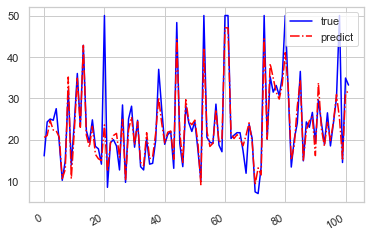

In [7]:
# 绘制对比折线图，看回归效果
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.set_theme(style="whitegrid")

ax.plot(range(testY.shape[0]),testY,color = 'blue',linewidth = 1.5,linestyle = '-')
ax.plot(range(testY.shape[0]),test_predict,color = 'red',linewidth = 1.5,linestyle = '-.')
ax.legend(['true',"predict"])

# 将x轴斜过来显示更好看
fig.autofmt_xdate()


In [14]:
print(r2Test)

0.8440672073722226
